In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

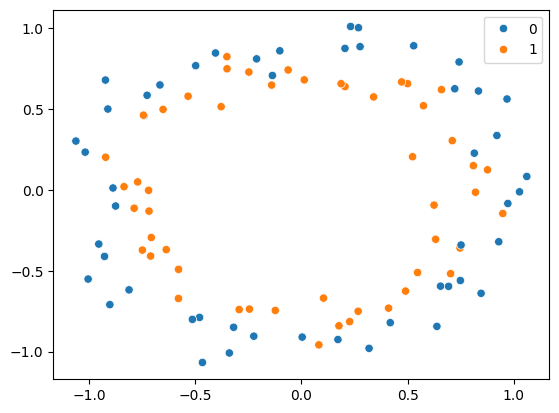

In [3]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\vikas\OneDrive\Desktop\Deep-Learning-CampusX\campus\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

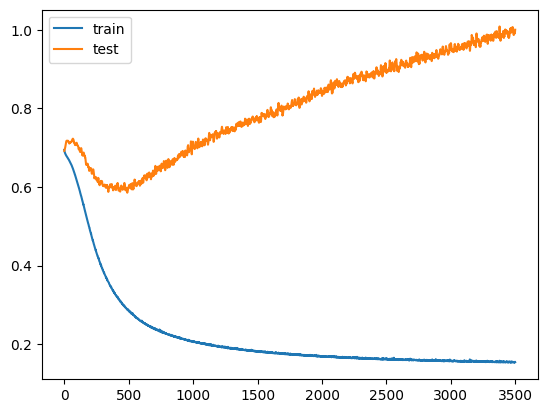

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 485us/step


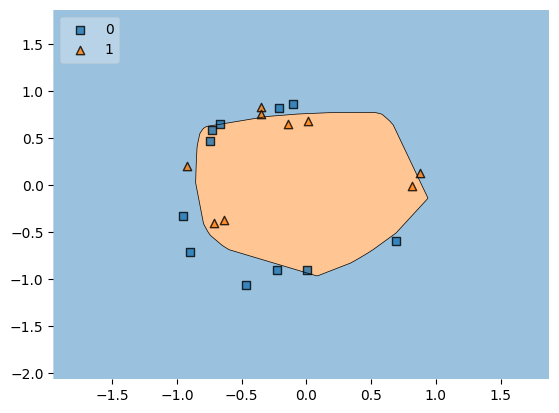

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# EarlyStopping in Python

`EarlyStopping` is a technique used in training neural networks to stop the training process when the performance on a validation dataset stops improving. This helps to prevent overfitting and saves computational resources by avoiding unnecessary training epochs.

In Python, `EarlyStopping` is commonly implemented using libraries like `Keras` or `PyTorch`. Here's an explanation of its parameters and how it works:

## Parameters in Keras `EarlyStopping`
In Keras, `EarlyStopping` is available as a callback in the `tensorflow.keras.callbacks` module. Below are the key parameters:

### **1. `monitor`**
- Specifies the metric to monitor during training (e.g., `val_loss`, `val_accuracy`).
- Default: `'val_loss'`.

### **2. `patience`**
- Number of epochs with no improvement to wait before stopping training.
- Default: `0`.
- Example: If `patience=3`, the training will stop if the monitored metric does not improve for 3 consecutive epochs.

### **3. `min_delta`**
- Minimum change in the monitored metric to qualify as an improvement.
- Default: `0.0`.
- Example: If `min_delta=0.01`, an improvement less than `0.01` will not reset the `patience` counter.

### **4. `mode`**
- Defines whether to look for an increase or decrease in the monitored metric.
  - `'min'`: Training stops when the monitored metric stops decreasing (e.g., for `val_loss`).
  - `'max'`: Training stops when the monitored metric stops increasing (e.g., for `val_accuracy`).
  - `'auto'`: Automatically infers the mode based on the metric name.

### **5. `restore_best_weights`**
- If `True`, restores the model weights from the epoch with the best monitored metric.
- Default: `False`.

### **6. `verbose`**
- Controls verbosity during training.
  - `0`: Silent.
  - `1`: Prints a message when training stops.

## Example Code in Keras
```python
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=3,          # Number of epochs to wait
    min_delta=0.01,      # Minimum improvement to reset patience
    mode='min',          # Stop when val_loss stops decreasing
    restore_best_weights=True,  # Restore best weights
    verbose=1            # Verbosity
)

# Use EarlyStopping in model training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping]
)


### **Early Stopping**

In [10]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5461 - loss: 0.6954 - val_accuracy: 0.4000 - val_loss: 0.7038
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5938 - loss: 0.6933 - val_accuracy: 0.4000 - val_loss: 0.7039
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5523 - loss: 0.6932 - val_accuracy: 0.3500 - val_loss: 0.7046
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5508 - loss: 0.6914 - val_accuracy: 0.3000 - val_loss: 0.7052
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5281 - loss: 0.6895 - val_accuracy: 0.4000 - val_loss: 0.7065
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5773 - loss: 0.6850 - val_accuracy: 0.4500 - val_loss: 0.7087
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4992 - loss: 0.6902 - val_accuracy: 0.4500 - val_loss: 0.7092
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5312 - loss: 0.6917 - val_accuracy: 0.4000 - v

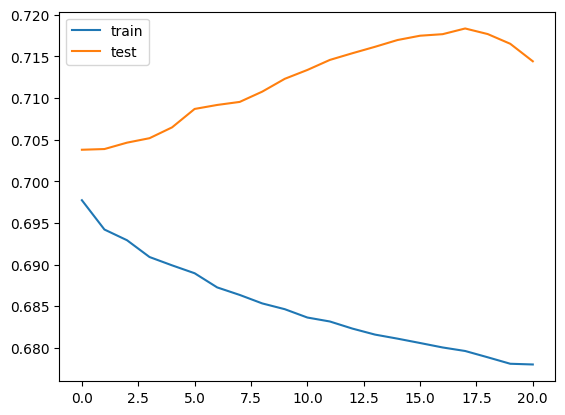

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 469us/step


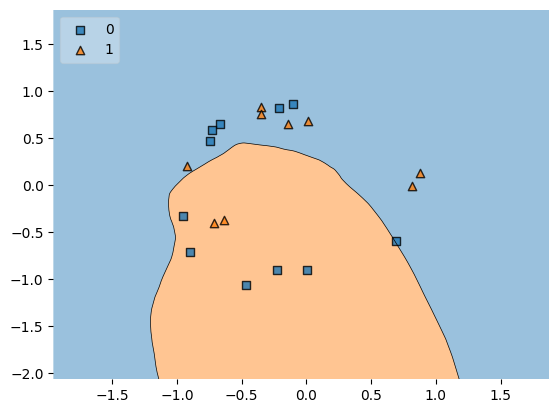

In [15]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [16]:
print("The End")

The End
